# Data Science: Analysis of Movies released in the cinema between 2000 and 2017

![title](movies.jpg)

# Introduction


The Internet Movie Database (IMDb) is a website that serves as an online database of world cinema. This website contains a large number of public data on films such as the title of the film, the year of release of the film, the genre of the film, the audience, the rating of critics, the duration of the film, the summary of the film, actors, directors and much more. Faced with the large amount of data available on this site, I thought that it would be interesting to analyze the movies data on the IMDb website between the year 2000 and the year 2017. 

# Objective

This notebook aims to analyse the movies data with many various graphics and gives an interpretation of these data.

# Python Stack

Python stack: Numpy, Matplotlib, Pandas and Seaborn

# Preparing the dataset

On the IMDb website, it is possible to filter the searches, and thus to display all the movies for one year, such as the year 2017. For example, the first page of all 2017 IMDb movies is available under the following URL:

http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1

So I started to list all the data available on this page, understand their meaning, and especially think of a way that can recover the data on IMDb. After having inventoried the data available on this page and understanding the meaning of each data item, I started the data selection phase, that is, the data I want to keep for my Data Science study.

Here are the data I want to keep:

* Movie title
* Genre of the film
* Duration of the film (in minutes)
* Release year of the film
* Number of public votes
* Public rating (score out of 10)
* Critics rating (score out of 100)
* Movie Gross (millions of dollars)

It remains now to recover these data on all the films between 2000 and 2017. My knowledge of HTML, CSS and Javascript helped me a lot to find a way to recover this data automatically. Like any website, the IMDb site code is HTML, CSS and Javascript. It was therefore necessary to parse this HTML code, and to recover only the concerned data between certain HTML tags and to apply this on several pages and on all the years of the year 2000 to the year 2017.

So I developed a Python script using the BeautifulSoup library, which allows to parse HTML code, I limited the parsing to 8 pages for each year, so starting with the year 2000, my Python script retrieves the data on 8 pages, then redo the same step on the following year until the year 2017. It is a webscraping technique.

In my Python script, I send a GET HTML request to the IMDb site to retrieve the concerned page at regular times. Before launching the Python script, I still looked at the IMDb website with the movie list, and I realized that some data is missing on this IMDb site. For some movies, there is for example, no gross, no votes or no duration of the film. Since there are a lot of movies, it is likely that there are other missing data, so if I had started my Python script, I would have got a dataset with missing values.

I have been thinking of several solutions to fix this dataset problem with missing values as follows:

1. Delete the line with the missing values
2. Fill empty fields with specific values
3. Fill empty fields with calculations

I opted for the first solution, so I updated my Python script, so that it does not take into account the movies whose data is missing during the parsing. Once done, I run my script then I got the dataset between 2000 and 2017.
From this dataset, I built a dataframe then converted this dataframe to CSV file named 'dataframeMovies.csv'.

# Data analysis

I loaded the CSV file 'dataframeMovies.csv' and with the Pandas library, it is possible to have an overview of this dataset and by applying functions like info(), describe() and head(), I checked the contents of my dataset.

In [1]:
import pandas as pd
import os

## Loading the dataset

In [2]:
IMDBMoviesFull = pd.read_csv('IMDB_Movies.csv')

In [4]:
len(IMDBMoviesFull)

4583

Dataset contains 4583 lines.

In [5]:
IMDBMoviesFull.head(10)

,Unnamed: 0,audienceRating,Genre,criticRating,timeMin,grossMillions,Movie,Vote,Year
0,0,8.5,Action,67,155,187.71,Gladiator,1096457,2000
1,1,8.5,Mystery,80,113,25.54,Memento,942923,2000
2,2,8.3,Comedy,55,104,30.33,Snatch - Tu braques ou tu raques,663244,2000
3,3,8.3,Drama,68,102,3.64,Requiem for a Dream,640047,2000
4,4,7.4,Action,64,104,157.30,X-Men,498388,2000
5,5,7.8,Adventure,73,143,233.63,Seul au monde,435798,2000
6,6,7.6,Crime,64,102,15.07,American Psycho,396271,2000
7,7,7.2,Drama,62,106,95.01,Incassable,284747,2000
8,8,7.0,Comedy,73,108,166.24,Mon beau-père et moi,277723,2000
9,9,6.1,Action,59,123,215.41,M-I:2 Mission: Impossible 2,263188,2000


I display the first 10 lines.

I delete the unnamed column.

In [6]:
#delete the useless column
del IMDBMoviesFull['Unnamed: 0']

In [8]:
IMDBMoviesFull.head(10)

,audienceRating,Genre,criticRating,timeMin,grossMillions,Movie,Vote,Year
0,8.5,Action,67,155,187.71,Gladiator,1096457,2000
1,8.5,Mystery,80,113,25.54,Memento,942923,2000
2,8.3,Comedy,55,104,30.33,Snatch - Tu braques ou tu raques,663244,2000
3,8.3,Drama,68,102,3.64,Requiem for a Dream,640047,2000
4,7.4,Action,64,104,157.30,X-Men,498388,2000
5,7.8,Adventure,73,143,233.63,Seul au monde,435798,2000
6,7.6,Crime,64,102,15.07,American Psycho,396271,2000
7,7.2,Drama,62,106,95.01,Incassable,284747,2000
8,7.0,Comedy,73,108,166.24,Mon beau-père et moi,277723,2000
9,6.1,Action,59,123,215.41,M-I:2 Mission: Impossible 2,263188,2000


## Maximum of some columns

In [9]:
max(IMDBMoviesFull.grossMillions)

936.66

In [11]:
IMDBMoviesFull[(IMDBMoviesFull['grossMillions'] == 936.66)]  

,audienceRating,Genre,criticRating,timeMin,grossMillions,Movie,Vote,Year
3900,8.1,Action,81,136,936.66,Star Wars: Episode VII - Le réveil de la Force,711233,2015


In [ ]:
max(dataMoviesFull.audienceRating)

In [12]:
IMDBMoviesFull[(IMDBMoviesFull['audienceRating'] == 9.0)]  

,audienceRating,Genre,criticRating,timeMin,grossMillions,Movie,Vote,Year
769,9.0,Documentary,80,235,0.00,The Century of the Self,3680,2002
2081,9.0,Action,82,152,534.86,The Dark Knight: Le chevalier noir,1865768,2008


## Overview of the dataset

In [23]:
IMDBMoviesFull.columns

Index(['audienceRating', 'Genre', 'criticRating', 'timeMin', 'grossMillions',
       'Movie', 'Vote', 'Year'],
      dtype='object')

In [24]:
IMDBMoviesFull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4583 entries, 0 to 4582
Data columns (total 8 columns):
audienceRating    4583 non-null float64
Genre             4583 non-null category
criticRating      4583 non-null int64
timeMin           4583 non-null int64
grossMillions     4583 non-null float64
Movie             4583 non-null category
Vote              4583 non-null int64
Year              4583 non-null int64
dtypes: category(2), float64(2), int64(4)
memory usage: 424.7 KB


In [25]:
IMDBMoviesFull.describe()

,audienceRating,criticRating,timeMin,grossMillions,Vote,Year
count,4583.000000,4583.000000,4583.000000,4583.000000,4.583000e+03,4583.000000
mean,6.510081,55.227144,107.127646,37.234787,8.450176e+04,2008.365263
std,0.993184,17.947463,18.810458,66.157452,1.334644e+05,5.102369
min,1.500000,5.000000,48.000000,0.000000,2.760000e+03,2000.000000
25%,5.900000,42.000000,94.000000,0.500000,1.428100e+04,2004.000000
50%,6.600000,56.000000,104.000000,10.910000,3.541600e+04,2008.000000
75%,7.200000,69.000000,116.000000,45.060000,9.317800e+04,2013.000000
max,9.000000,100.000000,366.000000,936.660000,1.865768e+06,2017.000000


In [21]:
# convert in category to count and use these columns
IMDBMoviesFull.Movie = IMDBMoviesFull.Movie.astype('category')
IMDBMoviesFull.Genre = IMDBMoviesFull.Genre.astype('category')
IMDBMoviesFull.Year = IMDBMoviesFull.Year.astype('int64')

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Music',
       'Mystery', 'Romance', 'Sci', 'Thriller', 'War', 'Western'],
      dtype='object')

In [17]:
IMDBMoviesFull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4583 entries, 0 to 4582
Data columns (total 8 columns):
audienceRating    4583 non-null float64
Genre             4583 non-null category
criticRating      4583 non-null int64
timeMin           4583 non-null int64
grossMillions     4583 non-null float64
Movie             4583 non-null category
Vote              4583 non-null int64
Year              4583 non-null int64
dtypes: category(2), float64(2), int64(4)
memory usage: 424.7 KB


In [19]:
IMDBMoviesFull.Genre.cat.categories

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Music',
       'Mystery', 'Romance', 'Sci', 'Thriller', 'War', 'Western'],
      dtype='object')

In [20]:
IMDBMoviesFull.Genre.cat.categories[0]

'Action'

# Visualization of data

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Joinplots

## Graphical representation of audience ratings based on critics ratings between 2000 and 2017

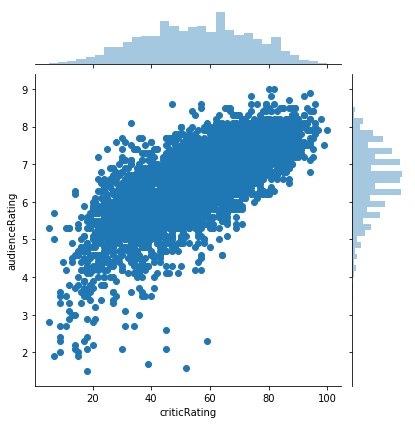

In [27]:
j1 = sns.jointplot(data=IMDBMoviesFull, x='criticRating', y='audienceRating')

We see that there is a high concentration of points, following a straight line, which means that in most cases, the audience ratings of the movies are in agreement with those of the critics ratings. We also see that for the public, the distribution is stronger between 5/10 and 8/10 and those of the critics between 30/100 and 80/100, which confirms that in most cases, the coherence between the audience ratings and critics ratings.

However, we can see that for some movies, the public is not in agreement with the critics, for example, for some movies, the audience ratings are between 1/10 and 3/10 while the ratings of the critics are between 40/100 and 60/100. We can also see that for other films, the audience ratings (ratings of the public) are between 4/10 and 7/10 while those of the critics are between 20/100 and 50/100.

In this graph, we can conclude that the public often appreciates the movies and generally gives a score above 5/10 while the critics are more severe because the ratings of the critics are often lower than those of the public for any movie.

## Joinplot with hexagonal

## Hexagon representation of audience ratings based on critics ratings between 2000 and 2017

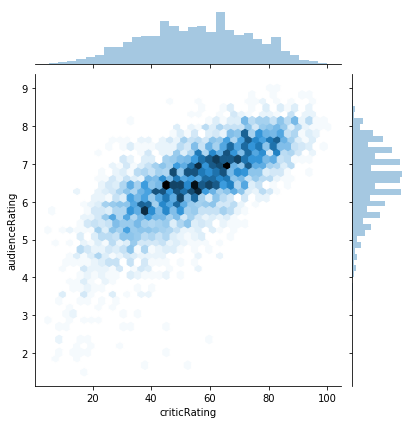

In [28]:
k1 = sns.jointplot(data=IMDBMoviesFull, x='criticRating', y='audienceRating', kind='hex')

On this graph, we can see the linearity of the notes between the audience and the critics.

## The most popular movies by the public and critics between 2000 and 2017

After searching the dataset, we can determine the most popular movies by the public and the critics. The best movies appreciated by the public between 2000 and 2017 are:

* "The Century of the Self” released in 2002 with a score of 9/10.
* "The Dark Knight: The Black Knight” released in 2008 with a score of 9/10.

The movie most appreciated by the critics is:

* “Boyhood” released in 2014 with a score of 100/100.

## Graphical representation of audience ratings by length of film between 2000 and 2017

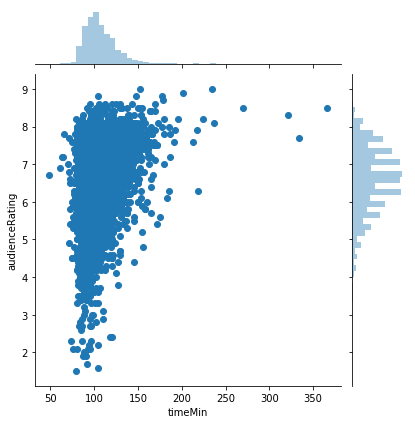

In [29]:
j2 = sns.jointplot(data=IMDBMoviesFull, y='audienceRating', x='timeMin')

On this graph, we see that most of the movies last between 60 minutes and 120 minutes and collect the most scores and these scores are between 4/10 and 8/10 with a majority of scores above 6/10.

For some films that last more than 3 hours (180 minutes), we notice that the public appreciates them because it generally gives a score above 7/10. In this graph, we see that the longest film lasts 366 minutes, ie 6 hours and 10 minutes and has a score of 8.5/10, and after a search in the dataset, it is about the film “Our best years” released in 2003 which is a drama film.

## Graphical representation of the ratings of the critics according to the duration of the film between 2000 and 2017

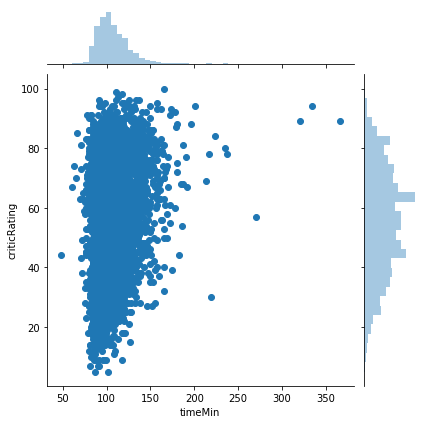

In [30]:
j3 = sns.jointplot(data=IMDBMoviesFull, y='criticRating', x='timeMin')

On this graph, we note that for films between 60 minutes and 120 minutes, the ratings of the critics are more concentrated and vary between 10/100 and 98/100.

## Graphical representation of the gross of the films according to the notes of the public between 2000 and 2017

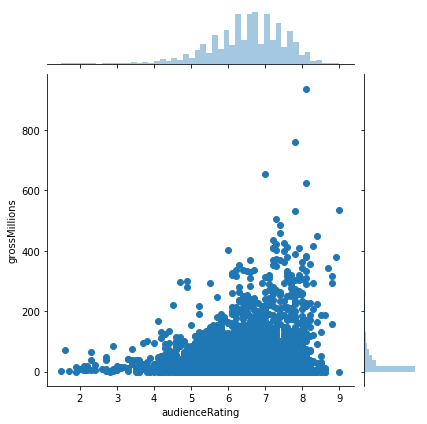

In [31]:
j4 = sns.jointplot(data=IMDBMoviesFull, y='grossMillions', x='audienceRating')

On this chart, it is clear that the movies that have been well rated by the public are movies that have generated the most millions of dollars, which is logical because if people have enjoyed a movie, they will talk about them, which will encourage other people to go to the cinema to see it, and thus increase the gross of the movie. Audience (public) ratings are more concentrated between 5/10 and 8/10.

**Movies that last a long time usually have a high score given by the audience**

In the dataset, the movie that brought in the most millions of dollars is the movie “Star Wars: Episode VII – The Force Awakens” with 936.66 million dollars released in 2015.

## Graphic representation of the gross of the films according to the scores of the critics between 2000 and 2017

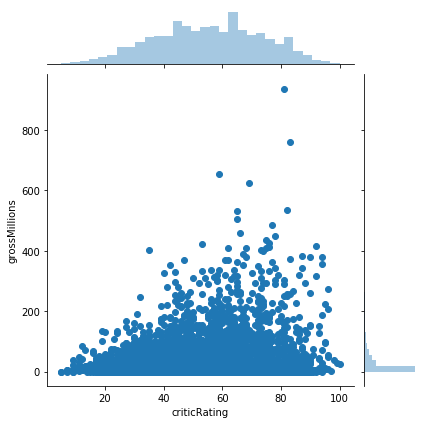

In [32]:
j5 = sns.jointplot(data=IMDBMoviesFull, x='criticRating', y='grossMillions')

In this graph, we note that the ratings of the critics are more concentrated between 30/100 and 80/100, which means that the critics are more demanding towards the films than the public. We also note that the films that have high ratings from critics are those who have brought back a lot of money.

## Graphical representation of the number of votes according to the scores of the public between 2000 and 2017

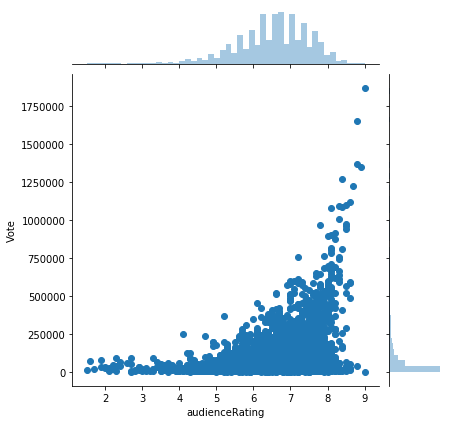

In [33]:
j6 = sns.jointplot(data=IMDBMoviesFull, x='audienceRating', y='Vote')

## Graphic representation of the gross of the films according to the duration of the film between 2000 and 2017

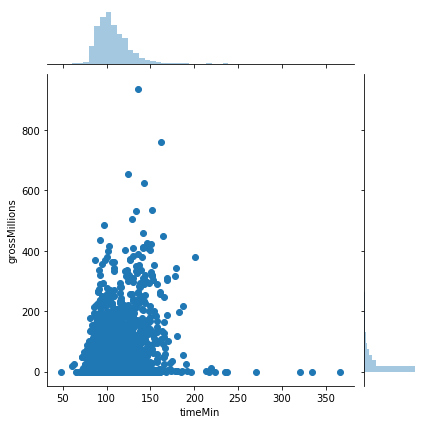

In [35]:
j7 = sns.jointplot(data=IMDBMoviesFull, x='timeMin', y='grossMillions')

On this graph, we notice that the movies between 60 minutes and 150 minutes (2h30) are the ones that bring the most. On the other hand, movies with a very long duration, exceeding 3 hours, yield much less, that is to say, under one million dollars.

We deduce that a director should avoid making a film with a duration at least 3 hours, and that he should limit his movie to duration between 1 and 2:30 so that his audience does not get tired during the projection of the film.

# Distribution by audience, critics, duration, gross, votes and year

# Distplot

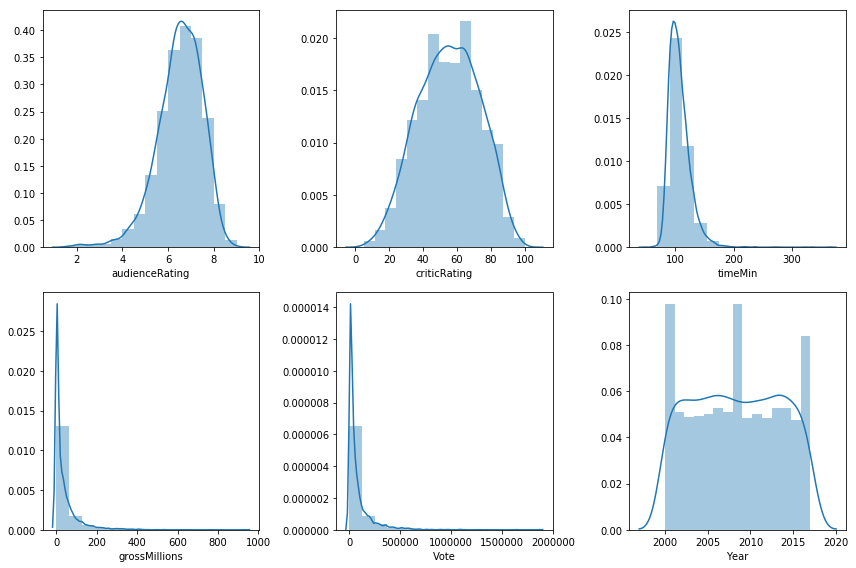

In [36]:
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(12, 8)

m1 = sns.distplot(IMDBMoviesFull.audienceRating, bins=15, ax=axes[0, 0])
m2 = sns.distplot(IMDBMoviesFull.criticRating, bins=15, ax=axes[0, 1])
m3 = sns.distplot(IMDBMoviesFull.timeMin, bins=15, ax=axes[0, 2])
m4 = sns.distplot(IMDBMoviesFull.grossMillions, bins=15, ax=axes[1, 0])
m5 = sns.distplot(IMDBMoviesFull.Vote, bins=15, ax=axes[1, 1])
m6 = sns.distplot(IMDBMoviesFull.Year, bins=15, ax=axes[1, 2])

#plt.setp(axes, yticks=[])
plt.tight_layout()

* Audience Ratings: Most of the audience ratings are between 6/10 and 7/10.
* Critics Ratings: Most critics ratings are between 40/100 and 70/100.
* Duration of the movie: a large number of films have a duration of 100 minutes (1h40).
* Movie Gross: Most movies are worth between 0 and 100 million dollars.
* Number of votes: Most votes are between 0 and 250000 votes.
* Year: Many movies were released in 2000, 2009 and 2017.

# Histograms of movies by genre between 2000 and 2017

## Preparing data for histograms

## Genre1 2000-2017

In [38]:
# subsetting the dataframe
dataMovies_2000_2017_genre1 = IMDBMoviesFull.loc[(IMDBMoviesFull.Genre == 'Action') | (IMDBMoviesFull.Genre == 'Adventure') | \
                       (IMDBMoviesFull.Genre == 'Animation') | (IMDBMoviesFull.Genre == 'Biography') | \
                       (IMDBMoviesFull.Genre == 'Comedy') | (IMDBMoviesFull.Genre == 'Crime')]

In [39]:
dataMovies_2000_2017_genre1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3206 entries, 0 to 4582
Data columns (total 8 columns):
audienceRating    3206 non-null float64
Genre             3206 non-null category
criticRating      3206 non-null int64
timeMin           3206 non-null int64
grossMillions     3206 non-null float64
Movie             3206 non-null category
Vote              3206 non-null int64
Year              3206 non-null int64
dtypes: category(2), float64(2), int64(4)
memory usage: 381.1 KB


In [40]:
dataMovies_2000_2017_genre1.Genre.cat.categories

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Music',
       'Mystery', 'Romance', 'Sci', 'Thriller', 'War', 'Western'],
      dtype='object')

In [41]:
#on supprime toutes les categories non utilises
dataMovies_2000_2017_genre1.Genre = dataMovies_2000_2017_genre1.Genre.cat.remove_unused_categories()

In [42]:
dataMovies_2000_2017_genre1.Genre.cat.categories

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime'], dtype='object')

In [43]:
dataMovies_2000_2017_genre1.head()

,audienceRating,Genre,criticRating,timeMin,grossMillions,Movie,Vote,Year
0,8.5,Action,67,155,187.71,Gladiator,1096457,2000
2,8.3,Comedy,55,104,30.33,Snatch - Tu braques ou tu raques,663244,2000
4,7.4,Action,64,104,157.30,X-Men,498388,2000
5,7.8,Adventure,73,143,233.63,Seul au monde,435798,2000
6,7.6,Crime,64,102,15.07,American Psycho,396271,2000


## Genre2 2000-2017

In [45]:
dataMovies_2000_2017_genre2 = IMDBMoviesFull.loc[(IMDBMoviesFull.Genre == 'Documentary') | (IMDBMoviesFull.Genre == 'Drama') | \
                       (IMDBMoviesFull.Genre == 'Family') | (IMDBMoviesFull.Genre == 'Fantasy') | \
                       (IMDBMoviesFull.Genre == 'Horror') | (IMDBMoviesFull.Genre == 'Music')]

In [46]:
dataMovies_2000_2017_genre2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 3 to 4579
Data columns (total 8 columns):
audienceRating    1329 non-null float64
Genre             1329 non-null category
criticRating      1329 non-null int64
timeMin           1329 non-null int64
grossMillions     1329 non-null float64
Movie             1329 non-null category
Vote              1329 non-null int64
Year              1329 non-null int64
dtypes: category(2), float64(2), int64(4)
memory usage: 273.0 KB


In [47]:
dataMovies_2000_2017_genre2.Genre.cat.categories

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Music',
       'Mystery', 'Romance', 'Sci', 'Thriller', 'War', 'Western'],
      dtype='object')

In [48]:
#on supprime toutes les categories non utilises
dataMovies_2000_2017_genre2.Genre = dataMovies_2000_2017_genre2.Genre.cat.remove_unused_categories()

dataMovies_2000_2017_genre2.Genre.cat.categories

Index(['Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Music'], dtype='object')

In [49]:
dataMovies_2000_2017_genre2.head()

,audienceRating,Genre,criticRating,timeMin,grossMillions,Movie,Vote,Year
3,8.3,Drama,68,102,3.64,Requiem for a Dream,640047,2000
7,7.2,Drama,62,106,95.01,Incassable,284747,2000
15,7.1,Horror,49,109,39.24,Pitch Black,204849,2000
18,6.7,Horror,36,98,53.33,Destination finale,196668,2000
20,8.1,Drama,83,154,5.38,Amours chiennes,190248,2000


## Genre3 2000-2017

In [50]:
dataMovies_2000_2017_genre3 = IMDBMoviesFull.loc[(IMDBMoviesFull.Genre == 'Mystery') | (IMDBMoviesFull.Genre == 'Romance') | \
                       (IMDBMoviesFull.Genre == 'Sci') | (IMDBMoviesFull.Genre == 'Thriller') | \
                       (IMDBMoviesFull.Genre == 'War') | (IMDBMoviesFull.Genre == 'Western')]

In [51]:
dataMovies_2000_2017_genre3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 1 to 4571
Data columns (total 8 columns):
audienceRating    48 non-null float64
Genre             48 non-null category
criticRating      48 non-null int64
timeMin           48 non-null int64
grossMillions     48 non-null float64
Movie             48 non-null category
Vote              48 non-null int64
Year              48 non-null int64
dtypes: category(2), float64(2), int64(4)
memory usage: 199.2 KB


In [52]:
dataMovies_2000_2017_genre3.Genre.cat.categories

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Music',
       'Mystery', 'Romance', 'Sci', 'Thriller', 'War', 'Western'],
      dtype='object')

In [53]:
#on supprime toutes les categories non utilises
dataMovies_2000_2017_genre3.Genre = dataMovies_2000_2017_genre3.Genre.cat.remove_unused_categories()

dataMovies_2000_2017_genre3.Genre.cat.categories

Index(['Mystery', 'Romance', 'Sci', 'Thriller', 'War', 'Western'], dtype='object')

In [54]:
dataMovies_2000_2017_genre3.head()

,audienceRating,Genre,criticRating,timeMin,grossMillions,Movie,Vote,Year
1,8.5,Mystery,80,113,25.54,Memento,942923,2000
184,7.1,Romance,78,135,3.04,Chez les heureux du monde,6641,2000
223,6.1,Romance,35,93,0.28,Peines d'amour perdues,4019,2000
326,6.6,Mystery,75,97,21.97,Une virée en enfer,56964,2001
477,7.3,War,56,112,0.26,Tmavomodrý svet,4941,2001


## Visualization of histograms of movies by genre between 2000 and 2017

Faced with the large amount of data, I divided my dataset into 3 sub dataset by grouping by 6 genres for each dataset because I had 18 genres of films on my whole dataset.

The genres of movies are:

* Action
* Adventure
* Animation
* Biography
* Comedy
* Crime
* Documentary
* Drama
* Family
* Fancy
* Horror
* Music
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western

I thus obtain three graphs of histograms by group of 6 genres.

## Histogram of the gross by genre of movie between 2000 and 2017

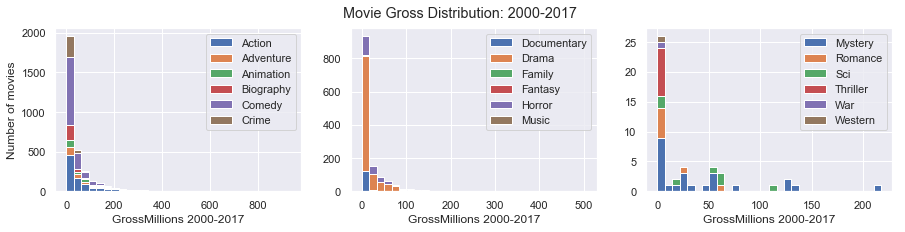

In [55]:
sns.set()

#2000-2017
grossByGenre_2000_2017_genre1 = list()
grossByGenre_2000_2017_genre2 = list()
grossByGenre_2000_2017_genre3 = list()

labels_2000_2017_genre1 = list()
labels_2000_2017_genre2 = list()
labels_2000_2017_genre3 = list()

#2000-2017
#2000-2017 genre1
for dataGenre_2000_2017_genre1 in dataMovies_2000_2017_genre1.Genre.cat.categories[0:6]:
    grossByGenre_2000_2017_genre1.append(dataMovies_2000_2017_genre1[dataMovies_2000_2017_genre1.Genre == \
                                                                     dataGenre_2000_2017_genre1].grossMillions)
    labels_2000_2017_genre1.append(dataGenre_2000_2017_genre1)

#2000-2017 genre2
for dataGenre_2000_2017_genre2 in dataMovies_2000_2017_genre2.Genre.cat.categories[0:6]:
    grossByGenre_2000_2017_genre2.append(dataMovies_2000_2017_genre2[dataMovies_2000_2017_genre2.Genre == \
                                                                     dataGenre_2000_2017_genre2].grossMillions)
    labels_2000_2017_genre2.append(dataGenre_2000_2017_genre2)

#2000-2017 genre3
for dataGenre_2000_2017_genre3 in dataMovies_2000_2017_genre3.Genre.cat.categories[0:6]:
    grossByGenre_2000_2017_genre3.append(dataMovies_2000_2017_genre3[dataMovies_2000_2017_genre3.Genre == \
                                                                     dataGenre_2000_2017_genre3].grossMillions)
    labels_2000_2017_genre3.append(dataGenre_2000_2017_genre3)   
       
# 3 lines, 3 columns
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 3) #size of A4 paper   

#2000-2017
ax[0].hist(grossByGenre_2000_2017_genre1, bins=30, stacked=True, rwidth=1, label=labels_2000_2017_genre1)
ax[1].hist(grossByGenre_2000_2017_genre2, bins=30, stacked=True, rwidth=1, label=labels_2000_2017_genre2)
ax[2].hist(grossByGenre_2000_2017_genre3, bins=30, stacked=True, rwidth=1, label=labels_2000_2017_genre3)

ax[0].set(xlabel='GrossMillions 2000-2017', ylabel='Number of movies')
ax[1].set(xlabel='GrossMillions 2000-2017')
ax[2].set(xlabel='GrossMillions 2000-2017')

plt.suptitle('Movie Gross Distribution: 2000-2017')
for i in range(3):
    ax[i].legend()

plt.show()

On this histogram, we see that the movies of biography, comedy, crime, drama and horror were the most numerous between 2000 and 2017. There were few mystery, western or war movies during this period.

We also note that the films that brought in the most (between 200 and 400 million dollars) are action, drama, and mystery movies.

## Histogram of audience ratings by genre of movie between 2000 and 2017

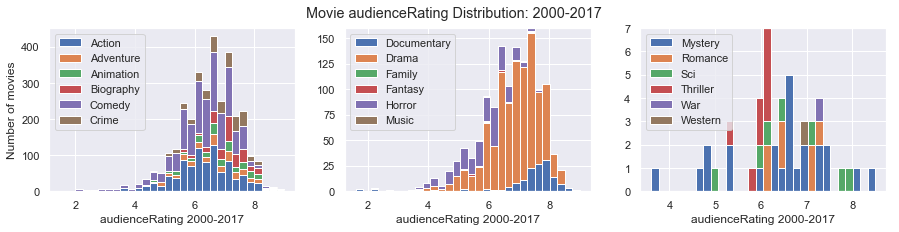

In [56]:
sns.set()

#2000-2017
grossByGenre_2000_2017_genre1 = list()
grossByGenre_2000_2017_genre2 = list()
grossByGenre_2000_2017_genre3 = list()

labels_2000_2017_genre1 = list()
labels_2000_2017_genre2 = list()
labels_2000_2017_genre3 = list()

#2000-2017
#2000-2017 genre1
for dataGenre_2000_2017_genre1 in dataMovies_2000_2017_genre1.Genre.cat.categories[0:6]:
    grossByGenre_2000_2017_genre1.append(dataMovies_2000_2017_genre1[dataMovies_2000_2017_genre1.Genre == \
                                                                     dataGenre_2000_2017_genre1].audienceRating)
    labels_2000_2017_genre1.append(dataGenre_2000_2017_genre1)

#2000-2017 genre2
for dataGenre_2000_2017_genre2 in dataMovies_2000_2017_genre2.Genre.cat.categories[0:6]:
    grossByGenre_2000_2017_genre2.append(dataMovies_2000_2017_genre2[dataMovies_2000_2017_genre2.Genre == \
                                                                     dataGenre_2000_2017_genre2].audienceRating)
    labels_2000_2017_genre2.append(dataGenre_2000_2017_genre2)

#2000-2017 genre3
for dataGenre_2000_2017_genre3 in dataMovies_2000_2017_genre3.Genre.cat.categories[0:6]:
    grossByGenre_2000_2017_genre3.append(dataMovies_2000_2017_genre3[dataMovies_2000_2017_genre3.Genre == \
                                                                     dataGenre_2000_2017_genre3].audienceRating)
    labels_2000_2017_genre3.append(dataGenre_2000_2017_genre3)   
       
# 3 lines, 3 columns
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 3) #size of A4 paper   

#2000-2017
ax[0].hist(grossByGenre_2000_2017_genre1, bins=30, stacked=True, rwidth=1, label=labels_2000_2017_genre1)
ax[1].hist(grossByGenre_2000_2017_genre2, bins=30, stacked=True, rwidth=1, label=labels_2000_2017_genre2)
ax[2].hist(grossByGenre_2000_2017_genre3, bins=30, stacked=True, rwidth=1, label=labels_2000_2017_genre3)

ax[0].set(xlabel='audienceRating 2000-2017', ylabel='Number of movies')
ax[1].set(xlabel='audienceRating 2000-2017')
ax[2].set(xlabel='audienceRating 2000-2017')

plt.suptitle('Movie audienceRating Distribution: 2000-2017')
for i in range(3):
    ax[i].legend()

plt.show()

We note that the action, adventure, animation, biography, comedy, crime, documentary, drama, mystery and science-fiction movies were the most appreciated by the audience (score superior or equal at 8/10).

## Histogram of the critics ratings by genre of movie between 2000 and 2017

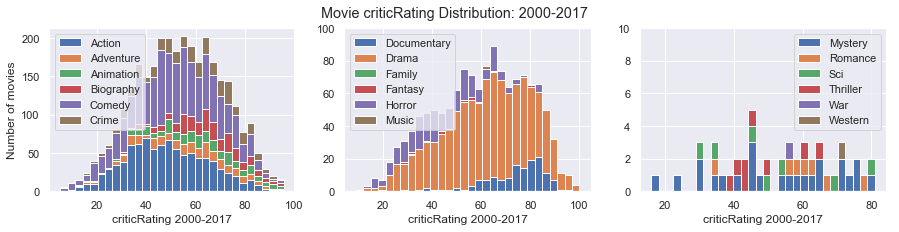

In [57]:
sns.set()

#2000-2017
grossByGenre_2000_2017_genre1 = list()
grossByGenre_2000_2017_genre2 = list()
grossByGenre_2000_2017_genre3 = list()

labels_2000_2017_genre1 = list()
labels_2000_2017_genre2 = list()
labels_2000_2017_genre3 = list()

#2000-2017
#2000-2017 genre1
for dataGenre_2000_2017_genre1 in dataMovies_2000_2017_genre1.Genre.cat.categories[0:6]:
    grossByGenre_2000_2017_genre1.append(dataMovies_2000_2017_genre1[dataMovies_2000_2017_genre1.Genre == \
                                                                     dataGenre_2000_2017_genre1].criticRating)
    labels_2000_2017_genre1.append(dataGenre_2000_2017_genre1)

#2000-2017 genre2
for dataGenre_2000_2017_genre2 in dataMovies_2000_2017_genre2.Genre.cat.categories[0:6]:
    grossByGenre_2000_2017_genre2.append(dataMovies_2000_2017_genre2[dataMovies_2000_2017_genre2.Genre == \
                                                                     dataGenre_2000_2017_genre2].criticRating)
    labels_2000_2017_genre2.append(dataGenre_2000_2017_genre2)

#2000-2017 genre3
for dataGenre_2000_2017_genre3 in dataMovies_2000_2017_genre3.Genre.cat.categories[0:6]:
    grossByGenre_2000_2017_genre3.append(dataMovies_2000_2017_genre3[dataMovies_2000_2017_genre3.Genre == \
                                                                     dataGenre_2000_2017_genre3].criticRating)
    labels_2000_2017_genre3.append(dataGenre_2000_2017_genre3)   
       
# 3 lines, 3 columns
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 3) #size of A4 paper   

#2000-2017
ax[0].hist(grossByGenre_2000_2017_genre1, bins=30, stacked=True, rwidth=1, label=labels_2000_2017_genre1)
ax[1].hist(grossByGenre_2000_2017_genre2, bins=30, stacked=True, rwidth=1, label=labels_2000_2017_genre2)
ax[2].hist(grossByGenre_2000_2017_genre3, bins=30, stacked=True, rwidth=1, label=labels_2000_2017_genre3)

ax[1].set_ylim([0, 100])
ax[2].set_ylim([0, 10])

ax[0].set(xlabel='criticRating 2000-2017', ylabel='Number of movies')
ax[1].set(xlabel='criticRating 2000-2017')
ax[2].set(xlabel='criticRating 2000-2017')

plt.suptitle('Movie criticRating Distribution: 2000-2017')
for i in range(3):
    ax[i].legend()

plt.show()

We note that adventure, animation, biography, comedy, documentary, drama, science fiction and mystery films are the top rated films by critics (score greater than or equal to 80/100).

## Histogram of votes by genre of movie between 2000 and 2017

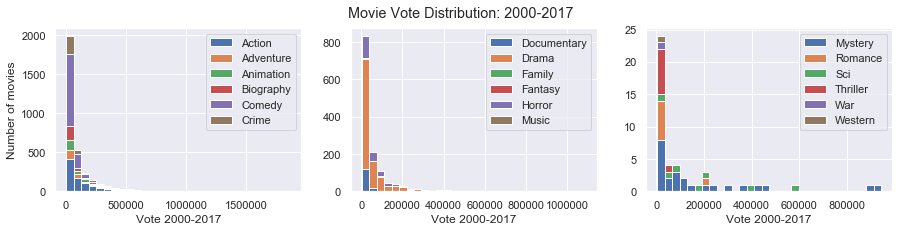

In [58]:
dataMovies_2000_2017_genre1.Year = dataMovies_2000_2017_genre1.Year.astype('int64')
dataMovies_2000_2017_genre1.Year = dataMovies_2000_2017_genre1.Year.astype('int64')
dataMovies_2000_2017_genre1.Year = dataMovies_2000_2017_genre1.Year.astype('int64')

sns.set()

#2000-2017
grossByGenre_2000_2017_genre1 = list()
grossByGenre_2000_2017_genre2 = list()
grossByGenre_2000_2017_genre3 = list()

labels_2000_2017_genre1 = list()
labels_2000_2017_genre2 = list()
labels_2000_2017_genre3 = list()

#2000-2017
#2000-2017 genre1
for dataGenre_2000_2017_genre1 in dataMovies_2000_2017_genre1.Genre.cat.categories[0:6]:
    grossByGenre_2000_2017_genre1.append(dataMovies_2000_2017_genre1[dataMovies_2000_2017_genre1.Genre == \
                                                                     dataGenre_2000_2017_genre1].Vote)
    labels_2000_2017_genre1.append(dataGenre_2000_2017_genre1)

#2000-2017 genre2
for dataGenre_2000_2017_genre2 in dataMovies_2000_2017_genre2.Genre.cat.categories[0:6]:
    grossByGenre_2000_2017_genre2.append(dataMovies_2000_2017_genre2[dataMovies_2000_2017_genre2.Genre == \
                                                                     dataGenre_2000_2017_genre2].Vote)
    labels_2000_2017_genre2.append(dataGenre_2000_2017_genre2)

#2000-2017 genre3
for dataGenre_2000_2017_genre3 in dataMovies_2000_2017_genre3.Genre.cat.categories[0:6]:
    grossByGenre_2000_2017_genre3.append(dataMovies_2000_2017_genre3[dataMovies_2000_2017_genre3.Genre == \
                                                                     dataGenre_2000_2017_genre3].Vote)
    labels_2000_2017_genre3.append(dataGenre_2000_2017_genre3)   
       
# 3 lines, 3 columns
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 3) #size of A4 paper   

#2000-2017
ax[0].hist(grossByGenre_2000_2017_genre1, bins=30, stacked=True, rwidth=1, label=labels_2000_2017_genre1)
ax[1].hist(grossByGenre_2000_2017_genre2, bins=30, stacked=True, rwidth=1, label=labels_2000_2017_genre2)
ax[2].hist(grossByGenre_2000_2017_genre3, bins=30, stacked=True, rwidth=1, label=labels_2000_2017_genre3)

ax[0].set(xlabel='Vote 2000-2017', ylabel='Number of movies')
ax[1].set(xlabel='Vote 2000-2017')
ax[2].set(xlabel='Vote 2000-2017')

plt.suptitle('Movie Vote Distribution: 2000-2017')
for i in range(3):
    ax[i].legend()

plt.show()

Animation, drama and mystery films received the most votes compared to other films.

# KDE Plot kernel density estimate

## Graphical representation of audience ratings based on critics ratings by genre of film between 2000 and 2017

As I divided my dataset into 3 parts of 6 genres of films, I get three graphics.

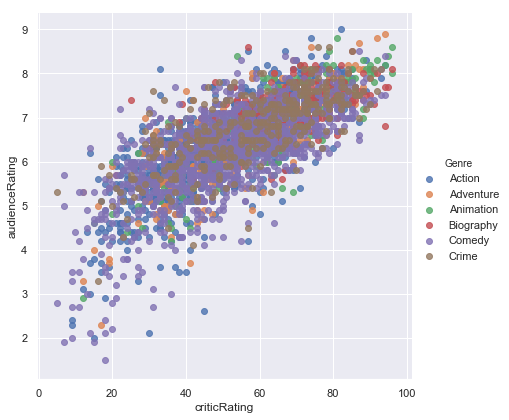

In [59]:
vis1 = sns.lmplot(data=dataMovies_2000_2017_genre1, x='criticRating', y='audienceRating', \
                 fit_reg=False, hue='Genre', size=6, aspect=1)

The public and critics share in most cases the same opinion on movies, especially for comedy or crime movies. Animation and adventure films are the most popular films by the public and critics.

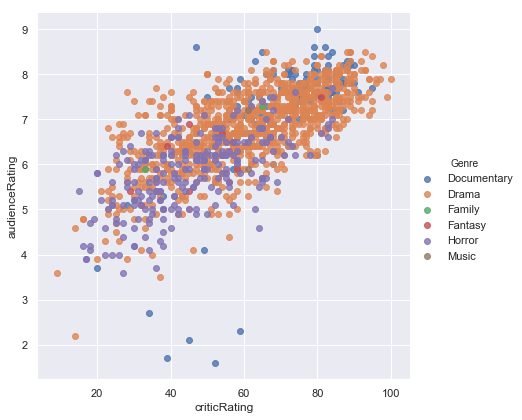

In [60]:
vis2 = sns.lmplot(data=dataMovies_2000_2017_genre2, x='criticRating', y='audienceRating', \
                 fit_reg=False, hue='Genre', size=6, aspect=1)

Drama and documentary films are the most appreciated by the public and critics.

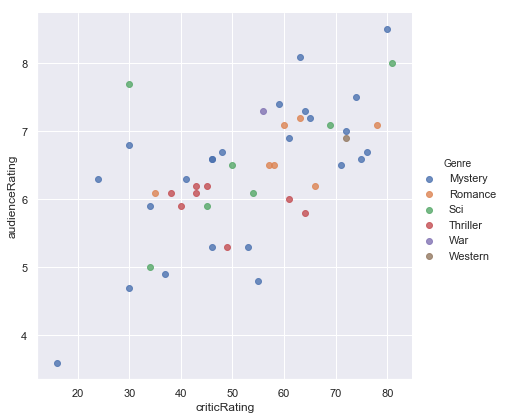

In [61]:
vis3 = sns.lmplot(data=dataMovies_2000_2017_genre3, x='criticRating', y='audienceRating', \
                 fit_reg=False, hue='Genre', size=6, aspect=1)

Mystery and science fiction movies are the most appreciated by the public and critics.

# boxplot and violinplot

## Boxplot of some data depending on the genres of movies between 2000 and 2017

In [62]:
dataMovies_2000_2017_genre1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3206 entries, 0 to 4582
Data columns (total 8 columns):
audienceRating    3206 non-null float64
Genre             3206 non-null category
criticRating      3206 non-null int64
timeMin           3206 non-null int64
grossMillions     3206 non-null float64
Movie             3206 non-null category
Vote              3206 non-null int64
Year              3206 non-null int64
dtypes: category(2), float64(2), int64(4)
memory usage: 380.5 KB


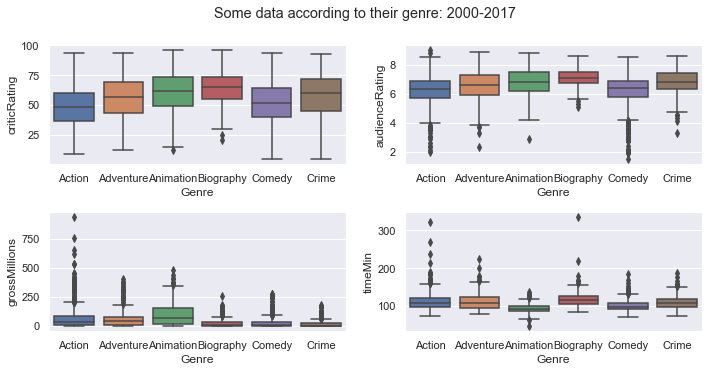

In [63]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(11.7, 5.27)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

sns.boxplot(data=dataMovies_2000_2017_genre1, x='Genre', y='criticRating', ax=axes[0, 0])
sns.boxplot(data=dataMovies_2000_2017_genre1, x='Genre', y='audienceRating', ax=axes[0, 1])
sns.boxplot(data=dataMovies_2000_2017_genre1, x='Genre', y='grossMillions', ax=axes[1, 0])
sns.boxplot(data=dataMovies_2000_2017_genre1, x='Genre', y='timeMin', ax=axes[1, 1])

plt.suptitle('Some data according to their genre: 2000-2017')

plt.show()

In [ ]:
sns.set()
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(11.7, 5.27)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

sns.boxplot(data=dataMovies_2000_2017_genre2, x='Genre', y='criticRating', ax=axes[0, 0])
sns.boxplot(data=dataMovies_2000_2017_genre2, x='Genre', y='audienceRating', ax=axes[0, 1])
sns.boxplot(data=dataMovies_2000_2017_genre2, x='Genre', y='grossMillions', ax=axes[1, 0])
sns.boxplot(data=dataMovies_2000_2017_genre2, x='Genre', y='timeMin', ax=axes[1, 1])

plt.suptitle('Some data according to their genre: 2000-2017')
plt.show()

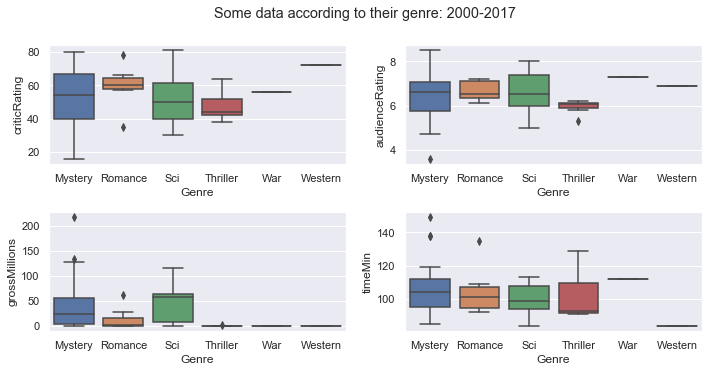

In [64]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(11.7, 5.27)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

sns.boxplot(data=dataMovies_2000_2017_genre3, x='Genre', y='criticRating', ax=axes[0, 0])
sns.boxplot(data=dataMovies_2000_2017_genre3, x='Genre', y='audienceRating', ax=axes[0, 1])
sns.boxplot(data=dataMovies_2000_2017_genre3, x='Genre', y='grossMillions', ax=axes[1, 0])
sns.boxplot(data=dataMovies_2000_2017_genre3, x='Genre', y='timeMin', ax=axes[1, 1])

plt.suptitle('Some data according to their genre: 2000-2017')
plt.show()

In these boxplots, one must refer to the median, at the minimum and maximum to have a view of the dispersion of the data around the median.

* Critics Ratings: Animation, biography, crime, drama, mystery and sci-fi are rated by critics.
* Audience Ratings: Animation, adventure, biography, crime, documentary, mystery and science-fiction are rated by the public the most.
* Gross for movies: Action, adventure, animation, family movies are the ones that have the most reported.
* Duration of movies: Action, adventure, biography, crime, family, drama and mystery movies are the ones that last the longest in terms of duration.

# violinpolot

We can also draw these boxplots in the form of violin plot (violins) as below:

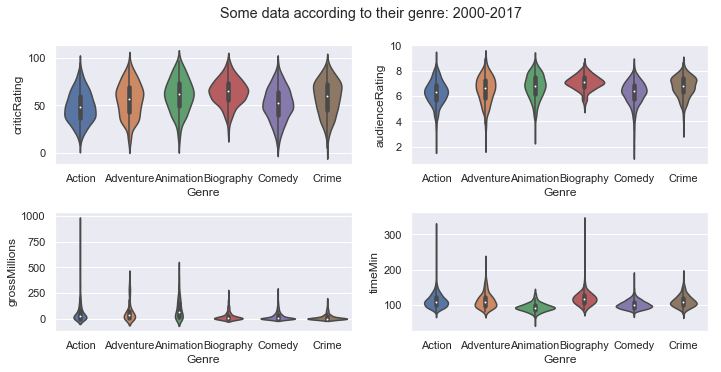

In [65]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(11.7, 5.27)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

sns.violinplot(data=dataMovies_2000_2017_genre1, x='Genre', y='criticRating', ax=axes[0, 0])
sns.violinplot(data=dataMovies_2000_2017_genre1, x='Genre', y='audienceRating', ax=axes[0, 1])
sns.violinplot(data=dataMovies_2000_2017_genre1, x='Genre', y='grossMillions', ax=axes[1, 0])
sns.violinplot(data=dataMovies_2000_2017_genre1, x='Genre', y='timeMin', ax=axes[1, 1])

plt.suptitle('Some data according to their genre: 2000-2017')
plt.show()

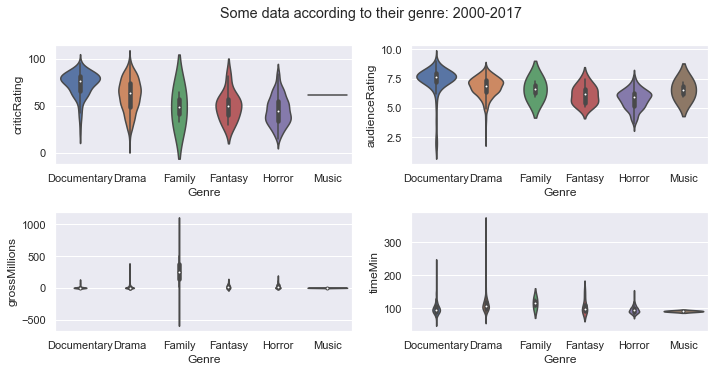

In [66]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(11.7, 5.27)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

sns.violinplot(data=dataMovies_2000_2017_genre2, x='Genre', y='criticRating', ax=axes[0, 0])
sns.violinplot(data=dataMovies_2000_2017_genre2, x='Genre', y='audienceRating', ax=axes[0, 1])
sns.violinplot(data=dataMovies_2000_2017_genre2, x='Genre', y='grossMillions', ax=axes[1, 0])
sns.violinplot(data=dataMovies_2000_2017_genre2, x='Genre', y='timeMin', ax=axes[1, 1])

plt.suptitle('Some data according to their genre: 2000-2017')
plt.show()

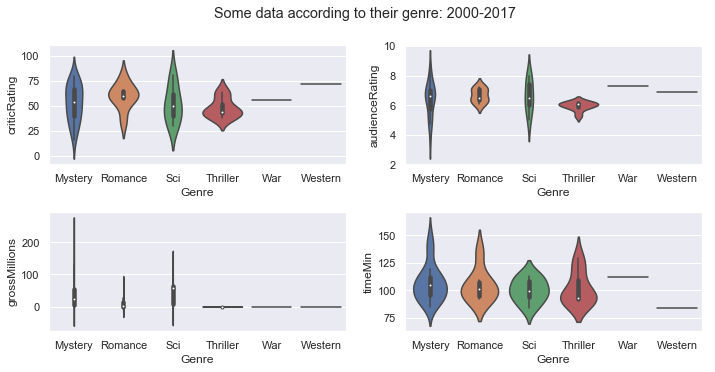

In [67]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(11.7, 5.27)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

sns.violinplot(data=dataMovies_2000_2017_genre3, x='Genre', y='criticRating', ax=axes[0, 0])
sns.violinplot(data=dataMovies_2000_2017_genre3, x='Genre', y='audienceRating', ax=axes[0, 1])
sns.violinplot(data=dataMovies_2000_2017_genre3, x='Genre', y='grossMillions', ax=axes[1, 0])
sns.violinplot(data=dataMovies_2000_2017_genre3, x='Genre', y='timeMin', ax=axes[1, 1])

plt.suptitle('Some data according to their genre: 2000-2017')
plt.show()

The interpretation of these charts is the same as those of boxplots.

With the Pandas library, I can also display graphs in grid form, which allows to display a large amount of information on the same graph.

I was able to display several information on the same graph which is:

* The audience rating on the y-axis
* The critics rating on the x-axis
* One genre per line
* One year per column

The dataset contains 18 years (2000 to 2017) and 18 genres, so there are many columns to display (18 columns) and genres to display. To improve visibility, I therefore divided in 6 years (2000 to 2005, 2006 to 2011 and 2012 to 2017).

# Facet Grid Histogram

# Dashboard

I drew 3 dashboards and each dashboards groups:

Audience ratings based on movie recipes
Ratings of the critics according to the movies gross
Movies gross according to their genre
Audience ratings based on critical ratings
The first dashboard is for Action, Adventure, Animation, Biography, Comedy and Crime movies from 2000 to 2017.

The second dashboard is for genre movies Documentary, Drama, Family, Fantasy, Horror and Music between 2000 and 2017.

The third dashboard is for genre movies Mystery, Romance, Science Fiction, Thriller, War and Western between 2000 to 2017.

The 3 dashboards show that the action, adventure, animation, and family films are the ones that reported the most, the audience ratings of the movies are quite close to those of the critics ratings, and the films that are well rated by the public and the critics are the ones who brought in a lot of money.

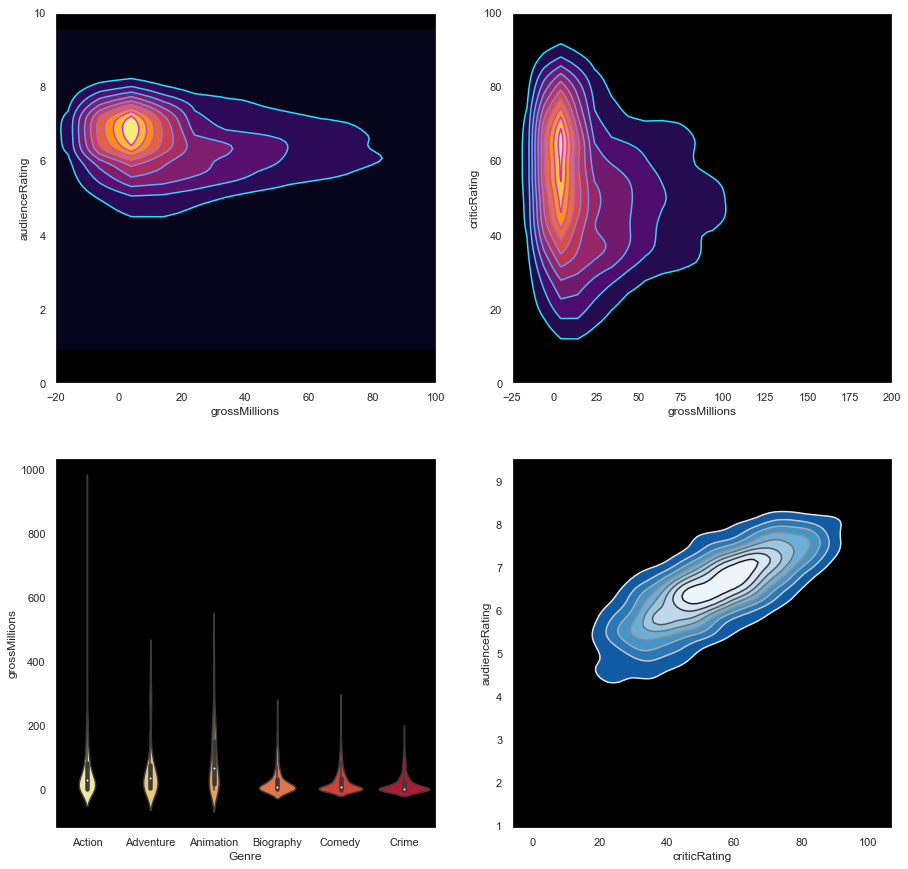

In [70]:
sns.set_style("dark", {"axes.facecolor": "black"}) #white, whitegrid, dark, darkgrid, ticks
f, axes = plt.subplots(2, 2, figsize=(15,15))

#Plot [0,0]
k1 = sns.kdeplot(dataMovies_2000_2017_genre1.grossMillions, dataMovies_2000_2017_genre1.audienceRating, \
                 shade=True, shade_lowest=True, cmap='inferno', \
                 ax=axes[0,0])

k1b = sns.kdeplot(dataMovies_2000_2017_genre1.grossMillions, dataMovies_2000_2017_genre1.audienceRating, \
                 cmap='cool',ax=axes[0,0])

#Plot [0,1]
k2 = sns.kdeplot(dataMovies_2000_2017_genre1.grossMillions, dataMovies_2000_2017_genre1.criticRating, \
                 shade=True, shade_lowest=False, cmap='inferno',  \
                 ax=axes[0,1])

k2b = sns.kdeplot(dataMovies_2000_2017_genre1.grossMillions, dataMovies_2000_2017_genre1.criticRating, \
                 cmap='cool', ax=axes[0,1])

#Plot [1,0]
z = sns.violinplot(data=dataMovies_2000_2017_genre1, \
                   x='Genre', y='grossMillions', ax=axes[1,0], \
                  palette='YlOrRd')

#Plot [1,1]
k4 = sns.kdeplot(dataMovies_2000_2017_genre1.criticRating, dataMovies_2000_2017_genre1.audienceRating, \
                shade=True, shade_lowest=False, cmap='Blues_r', \
                ax=axes[1,1])

k4b =sns.kdeplot(dataMovies_2000_2017_genre1.criticRating, dataMovies_2000_2017_genre1.audienceRating, \
              cmap='gist_gray_r', ax=axes[1,1])

k1.set(xlim=(-20,100), ylim=(0,10))
k2.set(xlim=(-25,200), ylim=(0,100))
plt.show()

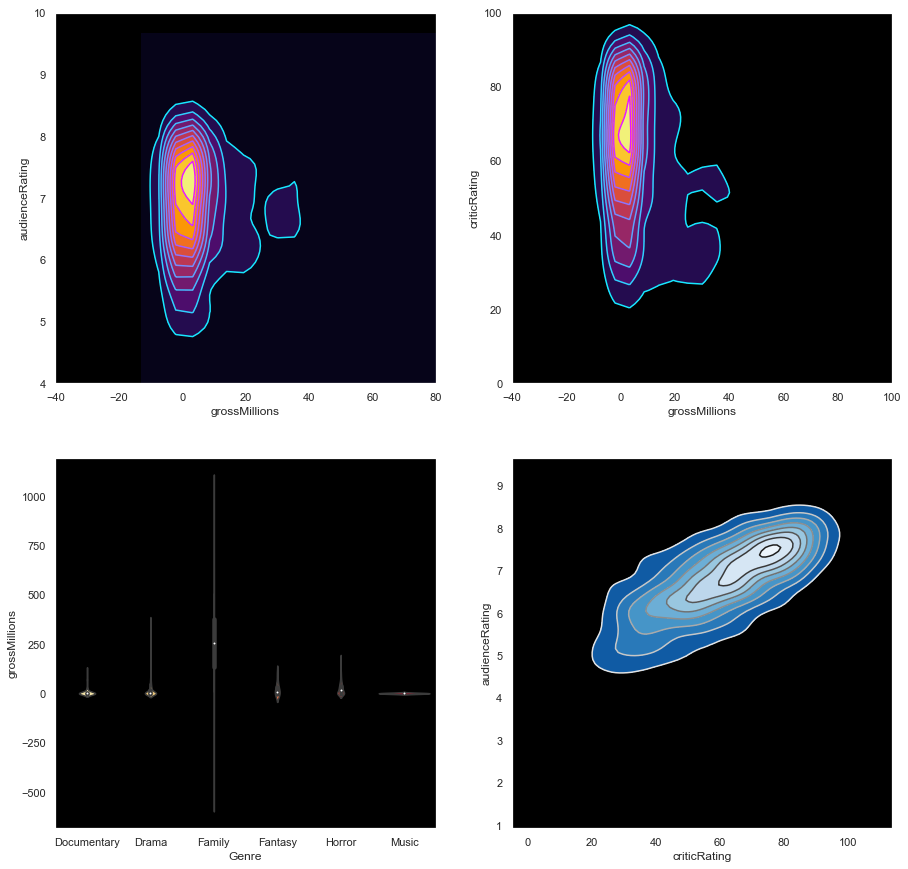

In [71]:
sns.set_style("dark", {"axes.facecolor": "black"}) #white, whitegrid, dark, darkgrid, ticks
f, axes = plt.subplots(2, 2, figsize=(15,15))

#Plot [0,0]
k1 = sns.kdeplot(dataMovies_2000_2017_genre2.grossMillions, dataMovies_2000_2017_genre2.audienceRating, \
                 shade=True, shade_lowest=True, cmap='inferno', \
                 ax=axes[0,0])

k1b = sns.kdeplot(dataMovies_2000_2017_genre2.grossMillions, dataMovies_2000_2017_genre2.audienceRating, \
                 cmap='cool',ax=axes[0,0])

#Plot [0,1]
k2 = sns.kdeplot(dataMovies_2000_2017_genre2.grossMillions, dataMovies_2000_2017_genre2.criticRating, \
                 shade=True, shade_lowest=False, cmap='inferno',  \
                 ax=axes[0,1])

k2b = sns.kdeplot(dataMovies_2000_2017_genre2.grossMillions, dataMovies_2000_2017_genre2.criticRating, \
                 cmap='cool', ax=axes[0,1])

#Plot [1,0]
z = sns.violinplot(data=dataMovies_2000_2017_genre2, \
                   x='Genre', y='grossMillions', ax=axes[1,0], \
                  palette='YlOrRd')

#Plot [1,1]
k4 = sns.kdeplot(dataMovies_2000_2017_genre2.criticRating, dataMovies_2000_2017_genre2.audienceRating, \
                shade=True, shade_lowest=False, cmap='Blues_r', \
                ax=axes[1,1])

k4b =sns.kdeplot(dataMovies_2000_2017_genre2.criticRating, dataMovies_2000_2017_genre2.audienceRating, \
              cmap='gist_gray_r', ax=axes[1,1])


k1.set(xlim=(-40,80), ylim=(4,10))
k2.set(xlim=(-40,100), ylim=(0,100))
plt.show()

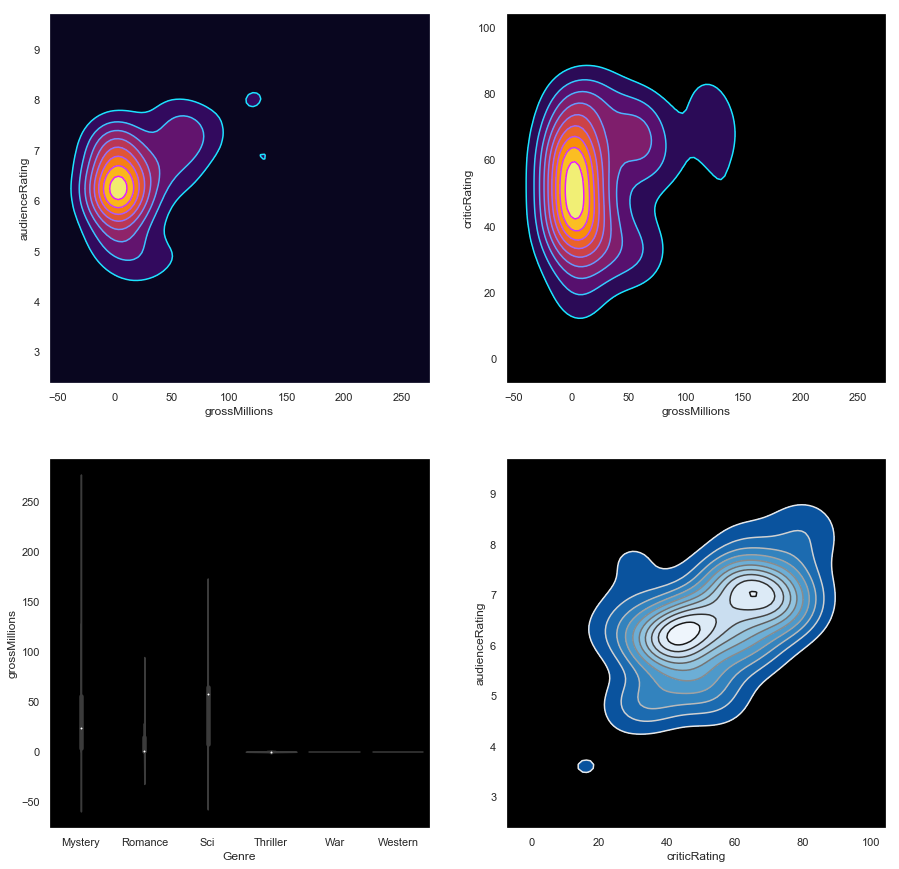

In [72]:
sns.set_style("dark", {"axes.facecolor": "black"}) #white, whitegrid, dark, darkgrid, ticks
f, axes = plt.subplots(2, 2, figsize=(15,15))

#Plot [0,0]
k1 = sns.kdeplot(dataMovies_2000_2017_genre3.grossMillions, dataMovies_2000_2017_genre3.audienceRating, \
                 shade=True, shade_lowest=True, cmap='inferno', \
                 ax=axes[0,0])

k1b = sns.kdeplot(dataMovies_2000_2017_genre3.grossMillions, dataMovies_2000_2017_genre3.audienceRating, \
                 cmap='cool',ax=axes[0,0])

#Plot [0,1]
k2 = sns.kdeplot(dataMovies_2000_2017_genre3.grossMillions, dataMovies_2000_2017_genre3.criticRating, \
                 shade=True, shade_lowest=False, cmap='inferno',  \
                 ax=axes[0,1])

k2b = sns.kdeplot(dataMovies_2000_2017_genre3.grossMillions, dataMovies_2000_2017_genre3.criticRating, \
                 cmap='cool', ax=axes[0,1])

#Plot [1,0]
z = sns.violinplot(data=dataMovies_2000_2017_genre3, \
                   x='Genre', y='grossMillions', ax=axes[1,0], \
                  palette='YlOrRd')

#Plot [1,1]
k4 = sns.kdeplot(dataMovies_2000_2017_genre3.criticRating, dataMovies_2000_2017_genre3.audienceRating, \
                shade=True, shade_lowest=False, cmap='Blues_r', \
                ax=axes[1,1])

k4b =sns.kdeplot(dataMovies_2000_2017_genre3.criticRating, dataMovies_2000_2017_genre3.audienceRating, \
              cmap='gist_gray_r', ax=axes[1,1])

plt.show()

# Conclusion

The preparation of the data, the modeling of these data, then the visualization of these data with a wide variety of graphs, and finally the interpretation of these graphs made it possible to conduct an analysis and a global view of movies released in the cinema between 2000 and 2017.

**This study through a large volume of data, allowed me to determine the following points for movies between 2000 and 2017:**

* Audience ratings of the movies are quite close to those of the critics ratings
* Critics rate more severely than the public
* Most movies last between 60 minutes and 120 minutes
* Movies that are well rated by public and critics make the most money
* The more the public appreciates a film, the more they vote and give a good rating
* Movies between 60 minutes and 150 minutes (2h30) make the most money
* Movies that exceed 3 hours bring in the least money
* Animation, biography, crime, drama, mystery and sci-fi movies are the highest rated by critics
* Animation, adventure, biography, crime, documentary, mystery and science-fiction movies are the highest rated by the public
* Action, adventure, animation and family movies are the ones that made the most money
* Action, adventure, biography, crime, family, drama and mystery movies are the ones that last the longest in terms of duration
* Biography, comedy, crime, drama and horror movies were the most numerous
* There were few mystery, western or war movies
* Movies that made the most money are action, drama and mystery movies